<div style="width: 100%; max-width: 100%; background-color: #f0f0f0; border: 2px solid #333; border-radius: 10px; padding: 20px; font-family: Arial, sans-serif; box-sizing: border-box;">
  <h2 style="color: #18453B; text-align: center;">Homework 04: Imputation</h2>
  
  <p style="color: #34495e; line-height: 1.6;">
    This HW is lighter than others to allow you to complete your project. Only 40 points total. 
  </p>
  
  <!-- <div style="background-color: #6FC276; color: white; padding: 10px; margin-top: 20px; text-align: center; border-radius: 5px;">
    <strong>Tip:</strong> Plan carefully!
  </div> -->
</div>

### Hashem, Wahid

<div style="width: 100%; max-width: 100%; background-color: #fefefe; border: 1px solid #333; border-radius: 10px; padding: 20px; font-family: Arial, sans-serif; box-sizing: border-box;">
  <h3 style="color: #18453B; text-align: center;">Problem 1: Test of MCAR Missingness (10 points)</h3>
  
  <p style="color: #34495e; line-height: 1.6;">
    A crucial first step before imputation is testing for the quality/mechanism of missingness. We typically start with a test for MCAR since that might be the easiest to repair, perhaps using a deletion method. Although we have mentioned this many times in the lecture, we have not actually discussed how to do it. 
    The plan for this HW problem is for you to learn and implement highly simplifed versions of two methods: the Expectation-Maximization (EM) and Little's MCAR Test methods. In the the real-world you would use libraries (https://pypi.org/project/missingpy/) for these, and not use a simplified approach, but then you would also not know what you are doing. This HW shows you what these methods are doing so that you can intelligently use full libraries. 
  </p>
  
  <ul style="color: #34495e; line-height: 1.6;">
    <li>Write Python code that reads the iris dataset.</li>
    <li>Make a heatmap of the correlation marix of the four numeric input features; this is the ground truth.</li>
    <li>Pick a column (e.g., `sepal width`) and randomly replace the values with `NaN`.</li>
    <li>Make a new heatmap and compare it with the original.</li>
    <li>Find the mean and variance of the (remaining) values in that column.</li>
    <li>Sample a normal distribution function with that mean and variance and create a new, fixed data matrix. This is the first step in the EM method: in a full implementation you would iterate new versions until convergence. 
    <li>Make yet a new heatmap. Note that you imputed in the previous (simplified) EM step completely at random: you literally used a random number generator with no bias. 
    <li>Compare the imputed-data heatmap to the heatmap from the data with missing values. Did the imputation, done completely at random,  change the correlation structure? This is the essence of Little's MCAR Test: the missing values are assumed to be MCAR, so you fill them accordingly and then see if that assumption is reasonable. (The Little Test is normally cast as a hypothesis test with a p value.) 
    <li>Once your have a working code, play with various choices and write down what you see. That is, change the column, change the percentage missing, etc. 
    <li>In a markdown cell, summarize what you learned and what advice you would give to your future self when you are working on data science projects. 
  </ul>

  I will give you some helper code to start with! If you use it, add detailed comments.
  
  <!-- <div style="background-color: #6FC276; color: white; padding: 10px; margin-top: 20px; text-align: center; border-radius: 5px;">
    <strong>Tip:</strong> Plan carefully!
  </div> -->
</div>

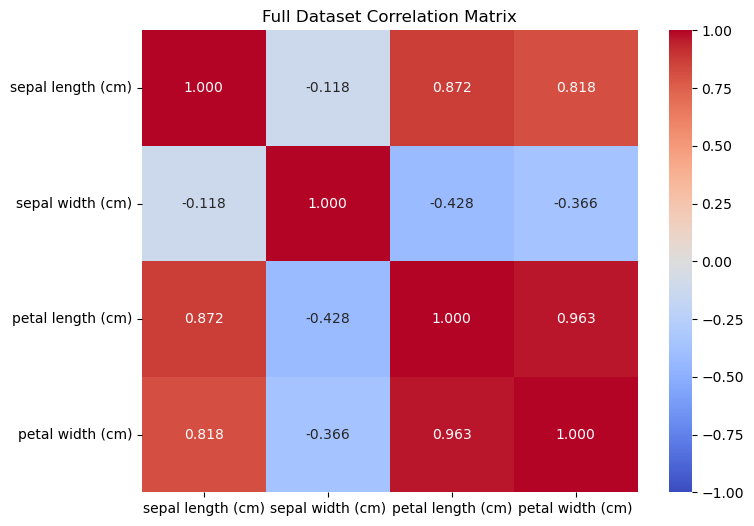

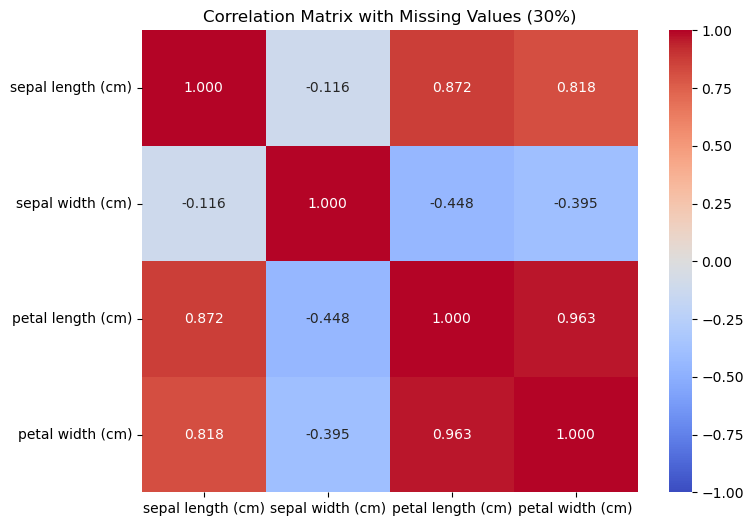

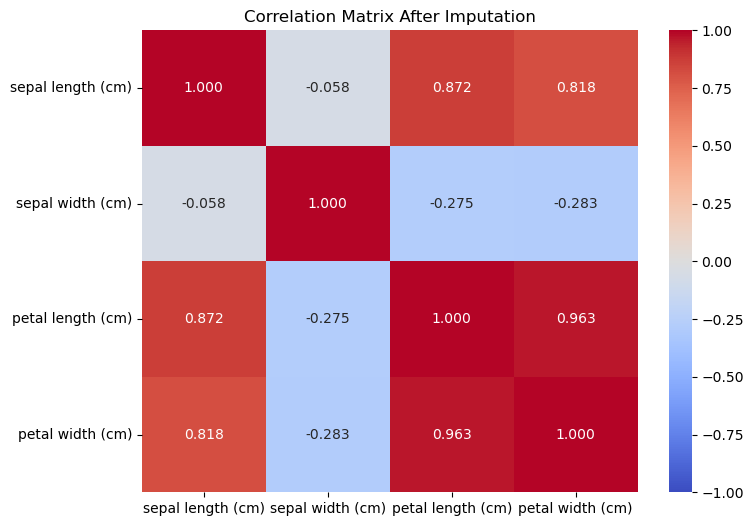

In [1]:
### ANSWER

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import datasets

iris = datasets.load_iris()
df = pd.DataFrame(data=iris.data, columns=iris.feature_names)

# plot the correlation heatmap
def plot_heatmap(dataframe, title):
    plt.figure(figsize=(8, 6))
    sns.heatmap(dataframe.corr(), annot=True, cmap='coolwarm', vmin=-1, vmax=1, fmt=".3f")
    plt.title(title)
    plt.show()

def plot_heatmap_subplots(missing_data, imputed_data):
    fig, axes = plt.subplots(1, 2, figsize=(16, 6))

    sns.heatmap(missing_data.corr(), annot=True, cmap='coolwarm', vmin=-1, vmax=1, fmt=".3f", ax=axes[0])
    axes[0].set_title("Correlation Matrix with Missing Values")

    sns.heatmap(imputed_data.corr(), annot=True, cmap='coolwarm', vmin=-1, vmax=1, fmt=".3f", ax=axes[1])
    axes[1].set_title("Correlation Matrix After Imputation")

    plt.tight_layout()
    # plt.show()

# full dataset correlation heatmap
plot_heatmap(df, "Full Dataset Correlation Matrix")

# missing values in one column (sepal width)
def introduce_missingness_in_column(dataframe, column, missing_rate=0.3):
    df_missing = dataframe.copy()
    mask = np.random.rand(df_missing.shape[0]) < missing_rate
    df_missing.loc[mask, column] = np.nan
    return df_missing

df_missing = introduce_missingness_in_column(df, 'sepal width (cm)', missing_rate=0.3) # Why use missing_rate here when  the function already has it?

# heatmap with missing values
plot_heatmap(df_missing, "Correlation Matrix with Missing Values (30%)")

# mean and variance of remaining values in 'sepal width'
mean_val = df_missing['sepal width (cm)'].mean()
std_val = df_missing['sepal width (cm)'].std()

# impute missing values using randn (Poor Man's EM)
missing_indices = df_missing['sepal width (cm)'].isna()
df_imputed = df_missing.copy()
df_imputed.loc[missing_indices, 'sepal width (cm)'] = np.random.randn(missing_indices.sum()) * std_val + mean_val

# heatmap after imputation
plot_heatmap(df_imputed, "Correlation Matrix After Imputation")


✏️ **Answer:**
- Compared to the heatmap with missing values, the imputed heatmap has weaker correlations. The correlations did not move back toward their original strengths. The correlations in the heatmap with missing values are actually closer to the original heatmap. For example, the correlation between sepal width and petal length was originally -0.428, and -0.450 with missing values, but after imputation, the correlation is -0.389. However, this was only one run; different runs may show completely different results.
- I also noticed that decreasing the missing rate (30% to 10%) makes the imputed heatmap closer to the original heatmap. For example, with a 10% missing rate, the correlation between sepal width and petal length is -0.391 after imputation, which is closer to the original -0.428. When increasing the missing rate to 90%, the correlation becomes -0.033, which is further away from the original and closer to zero.
- I learned that even when values are missing completely at random, simple random imputation cannot fully recover the original correlation structure. AS the missing rate increases, the differences in correlations becomes more noticeable.
- The advice I would give to my future self is to always check the correlation structure before and after imputation, especially when using simple methods like random sampling. Try different imputation methods and compare their effects on the data. Whiever method preserves the correlation structure best is likely the most appropriate for the dataset.


<div style="width: 100%; max-width: 100%; background-color: #fefefe; border: 1px solid #333; border-radius: 10px; padding: 20px; font-family: Arial, sans-serif; box-sizing: border-box;">
  <h3 style="color: #18453B; text-align: center;">Problem 2: Correlations and MAR Missingness (10 points)</h3>
  
  <p style="color: #34495e; line-height: 1.6;">
    Next, we will do the same set of steps as in the previous problem, but now for MAR. To make this easy, you will use almost everything you just did in the previous problem. That is, use the iris dataset, make correlation heatmaps, and so on. The difference is that you will not create the missing values radnomly but according to some pattern in another column. 
  </p>
  
  <ul style="color: #34495e; line-height: 1.6;">
    <li>Copy your code from problem 1 to here and get ready to modify it.</li>
    <li>Pick a column to add missing values to.</li>
    <li>Add the missing values, `np.nan`, to the column based on values in one of the other columns. You can do this however you want, but an easy way to start is by creating missing values when the value in another column is above a certain value.</li>
    <li>Again, compare correlation heatmaps for a few choices (e,g,m columns, missingness rules, etc.).</li>
    <li>How did the correlation heatmap change for this MAR case compared with the MCAR case? 
    <li>In a markdown cell, summarize what you learned and what advice you would give to your future self when you are working on data science projects.</li>
  </ul>

  Yes, I will give you some background and code to start with! AS always, comment it if you use any of it.
  
  <!-- <div style="background-color: #6FC276; color: white; padding: 10px; margin-top: 20px; text-align: center; border-radius: 5px;">
    <strong>Tip:</strong> Plan carefully!
  </div> -->
</div>

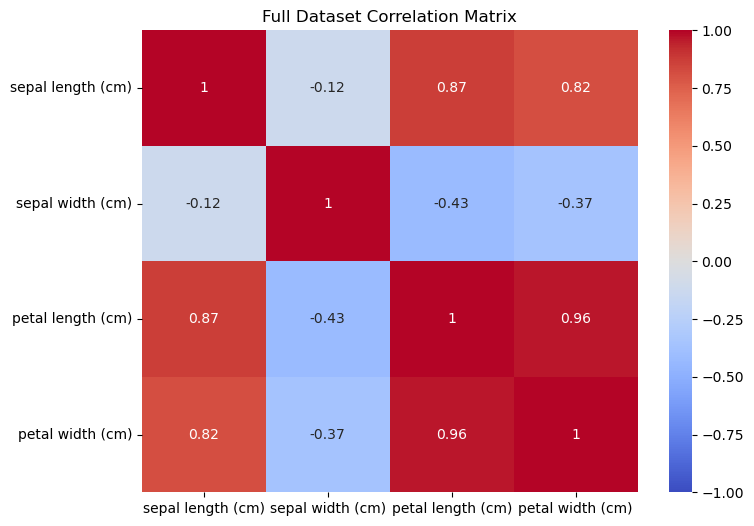

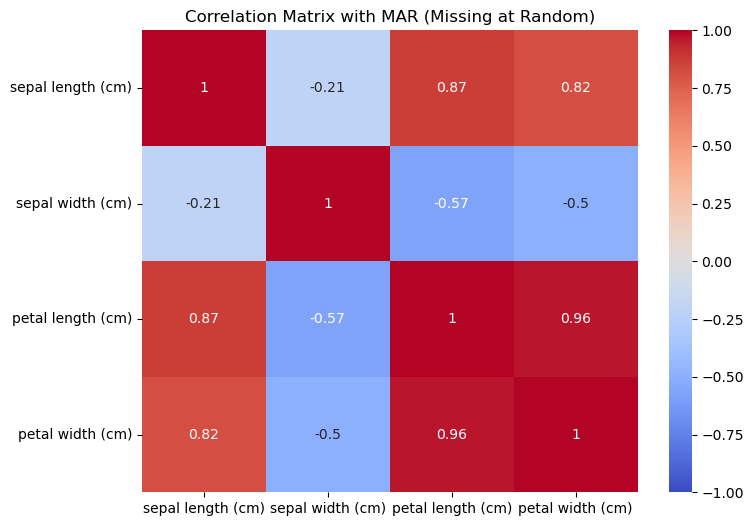

In [2]:
### ANSWER

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import datasets

iris = datasets.load_iris()
df = pd.DataFrame(data=iris.data, columns=iris.feature_names)

def plot_heatmap(dataframe, title):
    plt.figure(figsize=(8, 6))
    sns.heatmap(dataframe.corr(), annot=True, cmap='coolwarm', vmin=-1, vmax=1)
    plt.title(title)
    plt.show()

plot_heatmap(df, "Full Dataset Correlation Matrix")

# MAR: Make 'sepal width' missing based on 'petal length'
def introduce_MAR(dataframe, column_to_remove, reference_column, threshold):
    df_mar = dataframe.copy()
    
    # 'petal length' is above the threshold
    mask = df_mar[reference_column] > threshold
    
    # add missing values in 'sepal width' where 'petal length' is above the threshold
    df_mar.loc[mask, column_to_remove] = np.nan
    return df_mar

# set 'petal length' threshold for MAR
df_mar = introduce_MAR(df, 'sepal width (cm)', 'petal length (cm)', threshold=5.5)

# heatmap with MAR
plot_heatmap(df_mar, "Correlation Matrix with MAR (Missing at Random)")

✏️ **Answer:**
- Compared to MCAR, the missing heatmap for MAR shows more significant changes in correlations. For example, the correlation between sepal width and petal length changed from -0.43 in the original to -0.65 with missing values. This indicates that the missingness mechanism (MAR) has a stronger impact on the correlation structure since missingness is related to other variables.
- I also noticed that changing the threshold for missingness affects the correlations differently. A higher threshold results in fewer missing values and less impact on correlations, while a lower threshold increases the number of missing values and impacts the correlations more significantly. Thus, higher thresholds lead to correlation values that are closer to the original.
- I learned that MAR missingness can significantly change the correlation structure, especially when the missingness is related to other variables in the dataset. This is different from MCAR, where the missingness is random and has less impact on correlations.
- The advice I would give to my future self is to carefully consider the missingness type before imputing. Understanding whether the data is MCAR, MAR, or MNAR can help in choosing appropriate imputation methods and interpreting results. Always visualize and compare correlation structures before and after handling missing data.


<div style="width: 100%; max-width: 100%; background-color: #fefefe; border: 1px solid #333; border-radius: 10px; padding: 20px; font-family: Arial, sans-serif; box-sizing: border-box;">
  <h3 style="color: #18453B; text-align: center;">Problem 3: MAR Test (10 points)</h3>
  
  <p style="color: #34495e; line-height: 1.6;">
    Yet again, you will use the same codes from above. In problem 2 you explored MAR bit didn't actually perform a test. Let's create MAR data and create a test. As mentioned in the lecture, we can do this by creating an "indicator" variable. (This was the variable "R" in the missingness diagrams.) Again, we'll do this in a simple way so that you truly see it. In the real world you would use a machine learning classifier for this, but that isn't necessary to understand the MAR test itself. 
  </p>
  
  <ul style="color: #34495e; line-height: 1.6;">
    <li>Copy the MAR code over.</li>
    <li>Add a column to the dataframe that is either 0, not missing, or 1, missing.</li>
    <li>To test for MAR, we need to see if those 0's and 1's are correalted with values in one of the other columns.</li>
    <li>Perform that test. (Do this however you wish; it is you who needs to be convinced.)</li>
    <li>Describe what you see. Keep in mind that you used known correlations to create the MAR version of the dataset in the first place, so your test should be quite clear.</li>
  </ul>

  I will give you some background and code to start with! Don't look at it unless you plan to completely comment it! 
  
  <!-- <div style="background-color: #6FC276; color: white; padding: 10px; margin-top: 20px; text-align: center; border-radius: 5px;">
    <strong>Tip:</strong> Plan carefully!
  </div> -->
</div>

Correlation between 'sepal width missing' and 'petal length': 0.792
P-value: 0.000


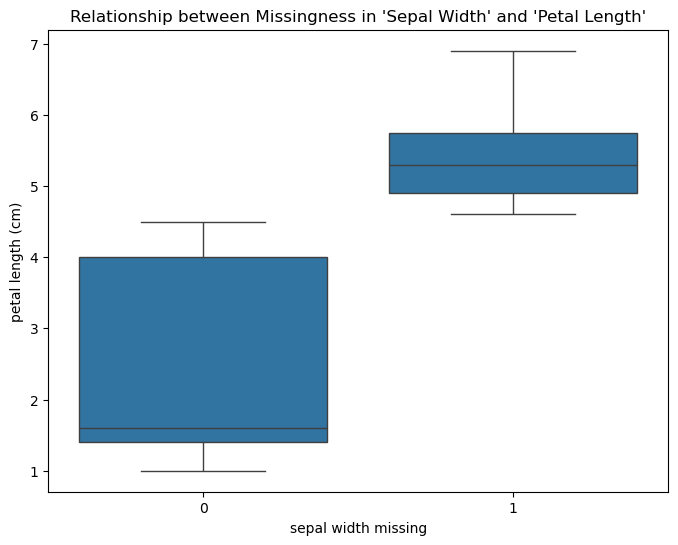

In [3]:
### ANSWER

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import datasets
from scipy.stats import pearsonr

# Load the Iris dataset
iris = datasets.load_iris()
df = pd.DataFrame(data=iris.data, columns=iris.feature_names)

# 1. Introduce MAR: Make 'sepal width' missing based on 'petal length'
def introduce_MAR(dataframe, column_to_remove, reference_column, threshold):
    df_mar = dataframe.copy()
    
    # Rows where 'petal length' is above the threshold
    mask = df_mar[reference_column] > threshold
    
    # Introduce missing values in 'sepal width' where 'petal length' is above the threshold
    df_mar.loc[mask, column_to_remove] = np.nan
    return df_mar

# Set 'petal length' threshold for MAR
df_mar = introduce_MAR(df, 'sepal width (cm)', 'petal length (cm)', threshold=4.5)

# 2. Add an indicator column for missingness in 'sepal width'
df_mar['sepal width missing'] = df_mar['sepal width (cm)'].isna().astype(int)

# 3. Check for correlation between 'sepal width missing' and 'petal length'
correlation, p_value = pearsonr(df_mar['sepal width missing'], df_mar['petal length (cm)'])

print(f"Correlation between 'sepal width missing' and 'petal length': {correlation:.3f}")
print(f"P-value: {p_value:.3f}")

# Visualize the relationship
plt.figure(figsize=(8, 6))
sns.boxplot(x='sepal width missing', y='petal length (cm)', data=df_mar)
plt.title("Relationship between Missingness in 'Sepal Width' and 'Petal Length'")
plt.show()

✏️ **Answer:**
- The boxplot shows that missing values in sepal width mainly occur when petal length is long. When sepal width is missing (1), petal length values are much higher compared to when it is not missing (0). This confirms that the missingness in sepal width depends on petal length, indicating that the data is missing at random (MAR) rather than completely at random (MCAR). The strong correlation (r = 0.792, p < 0.001) further supports this relationship.


---
## <font color=#18453B> Problem #4 Update on Your Project (10 pts) </font>

![missing](https://www.crosstab.io/articles/streamlit-review/worst_case_app.png)

By now you should have decided on the main topic of your project and the data that is going to be used to inform it. (If not, do that now!)
Your project is due at midnight, **October 19.**

For this HW, answer these questions:
1. clearly articulate the goal of your project (this goal might not be reached until the second half of the semester, of which half will be done by the midterm)
2. what are the datasets you plan to use?
3. describe the data: will you need to use, for example, encoding of any kind? 
4. what is your IDA strategy? 
5. list the detailed steps of your EDA strategy
6. are there imbalances in your dataset? how will you handle this? 
7. give a detailed account of your visualization plan, including why you made the choices you did 
8. all of this will end up in a Streamlit app: describe your planned layout and logic behind it




✏️ **Answer:** 
1. The goal of my project is to build a user-friendly Streamlit application that allows users to explore and compare patterns related to diabetes and chronic kidney disease (CKD) using two datasets from Kaggle. Users will explore how physiological factors such as blood glucose, blood pressure, BMI, and age relate to diabetes and CKD, which will test the narrative that people with diabetes are more likely to get CKD.

2. I have already started working on the project. I chose the Pima Indians Diabetes Dataset (https://www.kaggle.com/datasets/uciml/pima-indians-diabetes-database) and the Chronic Kidney Disease (CKD) Dataset (https://www.kaggle.com/datasets/mansoordaku/ckdisease/data) from Kaggle.

3. The datasets have numerous columns but I will focus on key features such as glucose levels, blood pressure, BMI, age, diabetes status, and CKD status. The Pima Indians Diabetes Database has no missing values, while the CKD dataset has some missing values that I will need to handle. I converted labels (yes/no and ckd/notckd) under diabetes status and ckd status to binary (1/0) for easier analysis. I removed the duplicates and improved the readability of the column names. I am planning to use multiple imputation methods (SimpleImputation, KNN, etc.) to handle the missing values in the CKD dataset. The UI of the app will allow the user to select different imputation methods and see how they affect the analysis.

4. My IDA strategy involves checking data types, missing values, basic statistics, and correlations. I will also check for outliers and data inconsistencies.

5. My EDA strategy involves categorizing variables into bins (BP, Glucose, BMI, Age), compare distributions and coutns across datasets, visualize relationships (boxplots, bar plots, scatter plots, heatmaps,etc), combine counts of shared features from both datasets (BP, Glucose, Age) for the relationship between diabetes and CKD, and look for patterns supporting the narrative that diabetes increases the risk of CKD.

6. Both datasets have uneven class distributions (more people without disease than with disease). Since the midterm project is mainly about exploration and visualization, not modeling, no balancing techniques will be needed (I am actually not sure if I will need to do any balancing).

7. Boxplots to show blood glucose levels by diabetes status and blood pressure by CKD status, bar plots to show BMI categories by diabetes status, scatter plots to show age vs blood glucose levels across both datasets (not sure on this one), heatmaps to show correlations between numerical features for both datasets, and finally a stacked bar plot to show counts of diabetes status by CKD status. I chose these visualizations because they show clarity and direct comparison between risk factors and disease status.

8. For the streamlit app layout, I plan to have a sidebar for user inputs (imputation methods, etc.). Tabs for datasets and a toggle switch to view raw/cleaned data. There will be basic statistics and correlations table below the data overview. And then the variable count tables for BP, glucose, BMI, and age between the two datasets (after converted to bins). Then comes the interactive visualizations (boxplots, bar plots, scatter plots, heatmaps, etc.). Finally, a conclusion section summarizing findings and insights from the analysis. The layout is designed to be intuitive and user-friendly, allowing users to easily navigate through different sections and understand the relationships between diabetes and CKD. I haven't planned where to put the ReadMe file in the UI yet, but I will figure it out later.

---
## Congratulations, you're done!

### 🛑 IMPORTANT: Before Submission

**STOP!** Before submitting your notebook, please follow these steps:

### Step 1: Restart Your Kernel

**Jupyter Notebook (Classic):**
- Go to `Kernel` → `Restart & Clear Output`

**JupyterLab:**
- Go to `Kernel` → `Restart Kernel and Clear All Outputs...`

**VS Code:**
- Open Command Palette (`Ctrl+Shift+P` / `Cmd+Shift+P`)
- Type "Jupyter: Restart" and select `Jupyter: Restart`
- Then select `Clear All Output`

**PyCharm:**
- Go to `Run` → `Restart Kernel` (or click the restart button in the toolbar)
- Go to `Cell` → `All Output` → `Clear`

### Step 2: Run All Cells

**Jupyter Notebook (Classic):**
- Go to `Cell` → `Run All`

**JupyterLab:**
- Go to `Run` → `Run All Cells`

**VS Code:**
- Open Command Palette (`Ctrl+Shift+P` / `Cmd+Shift+P`)
- Type "Jupyter: Run All" and select `Jupyter: Run All Cells`

**PyCharm:**
- Go to `Cell` → `Run All` (or use `Ctrl+Shift+F10` / `Cmd+Shift+R`)

### Step 3: Verify Everything Works

Check that all cells execute without errors and produce the expected output

This ensures that your notebook will run correctly when graded and that you haven't missed any dependencies or variable definitions that might exist only in your current session.

*Your submission will be tested in a fresh environment, so this step is crucial for full credit!*


### Step 4: Submit 
Submit this assignment by uploading your notebook to the course Desire2Learn web page.  Go to the "Homework" folder, find the appropriate submission link, and upload everything there. Make sure your name is on it!


&#169; Copyright 2025, Department of Computational Mathematics, Science and Engineering at Michigan State University.